In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# 1. Load the Data
data = pd.read_csv('/home/fymsc15/Aditya_WF/AIML/Assignment03/Position_Salaries.csv')
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

In [6]:
# 2. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
#  Decision Tree Regression
# 3. Create and Train the Model
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

# 4. Make Predictions
y_pred_dt_train = dt_reg.predict(X_train)
y_pred_dt_test = dt_reg.predict(X_test)

# 5. Evaluate
mse_dt_train = mean_squared_error(y_train, y_pred_dt_train)
rmse_dt_train = np.sqrt(mse_dt_train)
r2_dt_train = r2_score(y_train, y_pred_dt_train)

mse_dt_test = mean_squared_error(y_test, y_pred_dt_test)
rmse_dt_test = np.sqrt(mse_dt_test)
r2_dt_test = r2_score(y_test, y_pred_dt_test)

print("Decision Tree Regression:")
print("Training Metrics:")
print(f"MSE: {mse_dt_train:.2f}")
print(f"RMSE: {rmse_dt_train:.2f}")
print(f"R-squared: {r2_dt_train:.2f}")

print("\nTesting Metrics:")
print(f"MSE: {mse_dt_test:.2f}")
print(f"RMSE: {rmse_dt_test:.2f}")
print(f"R-squared: {r2_dt_test:.2f}")

Decision Tree Regression:
Training Metrics:
MSE: 0.00
RMSE: 0.00
R-squared: 1.00

Testing Metrics:
MSE: 20012500000.00
RMSE: 141465.54
R-squared: 0.60


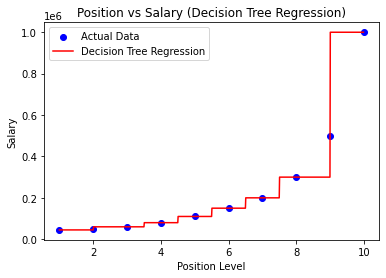

In [8]:
# 6. Visualize
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_grid, dt_reg.predict(X_grid), color='red', label='Decision Tree Regression')
plt.title('Position vs Salary (Decision Tree Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [9]:
# Support Vector Regression (SVR)

# 3. Feature Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()
X_scaled_train = sc_X.fit_transform(X_train)
y_scaled_train = sc_y.fit_transform(y_train.reshape(-1, 1))

X_scaled_test = sc_X.transform(X_test)
y_scaled_test = sc_y.transform(y_test.reshape(-1, 1))

# 4. Create and Train the Model
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_scaled_train, y_scaled_train.ravel())

# 5. Make Predictions
y_pred_svr_train = sc_y.inverse_transform(svr_reg.predict(X_scaled_train).reshape(-1, 1))
y_pred_svr_test = sc_y.inverse_transform(svr_reg.predict(X_scaled_test).reshape(-1, 1))

# 6. Evaluate
mse_svr_train = mean_squared_error(y_train, y_pred_svr_train)
rmse_svr_train = np.sqrt(mse_svr_train)
r2_svr_train = r2_score(y_train, y_pred_svr_train)

mse_svr_test = mean_squared_error(y_test, y_pred_svr_test)
rmse_svr_test = np.sqrt(mse_svr_test)
r2_svr_test = r2_score(y_test, y_pred_svr_test)

print("\nSupport Vector Regression:")
print("Training Metrics:")
print(f"MSE: {mse_svr_train:.2f}")
print(f"RMSE: {rmse_svr_train:.2f}")
print(f"R-squared: {r2_svr_train:.2f}")

print("\nTesting Metrics:")
print(f"MSE: {mse_svr_test:.2f}")
print(f"RMSE: {rmse_svr_test:.2f}")
print(f"R-squared: {r2_svr_test:.2f}")


Support Vector Regression:
Training Metrics:
MSE: 31501938076.21
RMSE: 177487.85
R-squared: 0.64

Testing Metrics:
MSE: 1992937599.35
RMSE: 44642.33
R-squared: 0.96


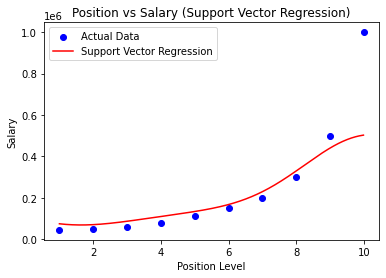

In [10]:
# 7. Visualize
X_grid = np.arange(min(X), max(X), 0.01).reshape(-1, 1)
X_grid_scaled = sc_X.transform(X_grid)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_grid, sc_y.inverse_transform(svr_reg.predict(X_grid_scaled).reshape(-1,1)), color='red', label='Support Vector Regression')
plt.title('Position vs Salary (Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()